In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import networkx as nx


In [48]:
deal = pd.read_csv("alliances_tech.csv",skiprows=5)
deal.head()

,Entreprise A,Entreprise B,Type d'alliance,Date,Concurrence,Explication alliance,Source,commentaire
0,Adobe,Figma,Tentative d'acquisition,NaN,NaN,Tentative d’acquisition stratégique - annulée,https://www.forbes.fr/business/adobe-met-fin-a...,NaN
1,Alibaba,Baidu,Accord de coopération stratégique,NaN,NaN,Collaboration sur IA générative,https://consent.yahoo.com/v2/collectConsent?se...,NaN
2,Alibaba,Apple,Accord de coopération stratégique,NaN,NaN,Partenariat sur l'IA en Chine,https://www.lesechos.fr/tech-medias/intelligen...,NaN
3,Amazon,Nvidia,Accord de coopération stratégique,NaN,NaN,Partenariat sur cloud et GPU pour IA générativ...,https://www.tradingsat.com/amazoncom-US0231351...,partenaire depuis 14ans
4,Amazon,Verizon,Accord de coopération stratégique,NaN,NaN,Partenariat edge computing 5G,https://www.cnbc.com/2021/10/26/verizon-partne...,NaN


In [54]:
display((deal["Entreprise A"].unique()))

array(['Adobe', 'Alibaba', 'Amazon', 'AMD', 'Anthropic', 'Apple', 'AWS',
       'Baidu', 'Broadcom', 'BYD', 'ByteDance', 'Capgemini', 'Databricks',
       'Ericsson', 'Google', 'Google DeepMind (A)', 'Huawei', 'IBM',
       'Open AI ', 'Intel', 'Lift ', 'Microsoft', 'MediaTek', 'Meta',
       'Netflix', 'Nokia', 'Nvidia', 'Nvidia ', 'OpenAI', 'OpenAI ',
       'Oracle', 'Pinterest', 'Qualcomm', 'Rivian', 'Salesforce',
       'Samsung', 'Snowflake', 'Sony (A)', 'Sony', 'Spotify', 'Tesla',
       'Tesla ', 'Thales', 'TSMC', 'Twitter (X)', 'Uber', 'Waymo',
       'YouTube', 'Toyota', 'Honda', 'Cruise'], dtype=object)

In [55]:
display((deal["Entreprise B"].unique()))

array(['Figma', 'Baidu', 'Apple', 'Nvidia', 'Verizon', 'Hugging Face',
       'SAP', 'Anthropic', 'TSMC', 'Salesforce', 'Google Cloud',
       'Broadcom', 'Foxconn', 'Adobe', 'Uber', 'Huawei', 'Deepseek',
       'Amazon', 'Cloud4C', 'WNC', 'DeltaCapita', 'Microsoft', 'Orange',
       'Samsung', 'Oxford University (B)', 'Tencent', 'Vodafone',
       'Red Hat', 'Oracle', 'LinkedIn', 'Scale AI', 'AWS', 'Corewave',
       'Facebook', 'OpenAI', 'AT&T', 'Databricks', 'Darabricks', 'GitHub',
       'GitLab', 'Yahoo', 'Google', 'Arm', 'Intel', 'AMD', 'Alphabet ',
       'ByteDanceUS', 'Qualcomm', 'TSMC (B)', 'Honda', 'Panasonic',
       'eToro', 'Volvo', 'Universal Music', 'Youtube', 'Waymo', 'Cruise',
       'GM'], dtype=object)

In [10]:
deal["Type d'alliance"].value_counts()

Type d'alliance
Accord de coopération stratégique        57
Client/fournisseur                       14
Investissement                           12
Acquisition                               5
Jointventure                              5
Accord de publicité                       4
Petite Acquisition                        3
Tentative d'acquisition                   2
Transfert de propriété intellectuelle     2
Ancien partenariat                        1
FUTUR collab                              1
Name: count, dtype: int64

In [37]:
deal_save= deal

## Nettoyage

In [49]:
deal = deal[
    (deal["Type d'alliance"] != "FUTUR collab") &
    (deal["Type d'alliance"] != "Petite Acquisition") &
    (deal["Type d'alliance"] != "Ancien partenariat") ]

In [50]:
# Liste des termes à remplacer
alphabet_alias = [ "Google", "Waymo","GOOGLE", "google","Google DeepMind", "Google DeepMind (A)", "deepmind", "Google Deep Ming", "Google Cloud" ]
openai_alias =["Open AI", "Open Ai", "OpenAi"]
meta_alias=["meta", "Facebook", "Meta"]
amazon_alias =["AWS"]
YT_alias =["Youtube"]
# Fonction de nettoyage pour supprimer les suffixes entre parenthèses
def remove_parentheses(text):
    return re.sub(r"\s*\([^)]*\)$", "", text) 
    
# Application sur les deux colonnes
for col in ['Entreprise A', 'Entreprise B']:
    deal[col] = deal[col].astype(str).str.strip()            # trim espaces
    deal[col] = deal[col].apply(remove_parentheses)          # enlève parenthèse finale
    deal[col] = deal[col].replace(alphabet_alias, "Alphabet", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(openai_alias, "OpenAI", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(meta_alias, "Meta", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(amazon_alias, "Amazon", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].replace(YT_alias, "YouTube", regex=False)  # remplace variantes Alphabet
    deal[col] = deal[col].str.strip()   


display((deal["Entreprise A"].unique()))
display((deal["Entreprise B"].unique()))

array(['Adobe', 'Alibaba', 'Amazon', 'AMD', 'Anthropic', 'Apple', 'Baidu',
       'Broadcom', 'BYD', 'ByteDance', 'Databricks', 'Ericsson',
       'Alphabet', 'Huawei', 'IBM', 'OpenAI', 'Intel', 'Lift',
       'Microsoft', 'MediaTek', 'Meta', 'Netflix', 'Nokia', 'Nvidia',
       'Oracle', 'Pinterest', 'Qualcomm', 'Rivian', 'Salesforce',
       'Samsung', 'Snowflake', 'Sony', 'Spotify', 'Tesla', 'Thales',
       'TSMC', 'Uber', 'YouTube', 'Toyota', 'Honda', 'Cruise', 'Red Hat',
       'Arm'], dtype=object)

array(['Figma', 'Baidu', 'Apple', 'Nvidia', 'Verizon', 'Hugging Face',
       'SAP', 'Anthropic', 'TSMC', 'Salesforce', 'Alphabet', 'Broadcom',
       'Foxconn', 'Adobe', 'Uber', 'Huawei', 'Deepseek', 'Amazon',
       'Microsoft', 'Orange', 'Samsung', 'Oxford University', 'Tencent',
       'Vodafone', 'Red Hat', 'Oracle', 'LinkedIn', 'Scale AI',
       'Corewave', 'Meta', 'OpenAI', 'AT&T', 'Databricks', 'Darabricks',
       'GitHub', 'GitLab', 'Yahoo', 'Arm', 'Intel', 'AMD', 'ByteDanceUS',
       'Qualcomm', 'Honda', 'Volvo', 'Universal Music', 'YouTube',
       'Cruise', 'GM'], dtype=object)

## Graphe non orienté complet

In [40]:
# Créer le graphe non orienté
G = nx.from_pandas_edgelist(deal, 'Entreprise A', 'Entreprise B')
print(f"Nombre d'entreprises : {G.number_of_nodes()} | Nombre d'alliances : {G.number_of_edges()}")


Nombre d'entreprises : 67 | Nombre d'alliances : 97


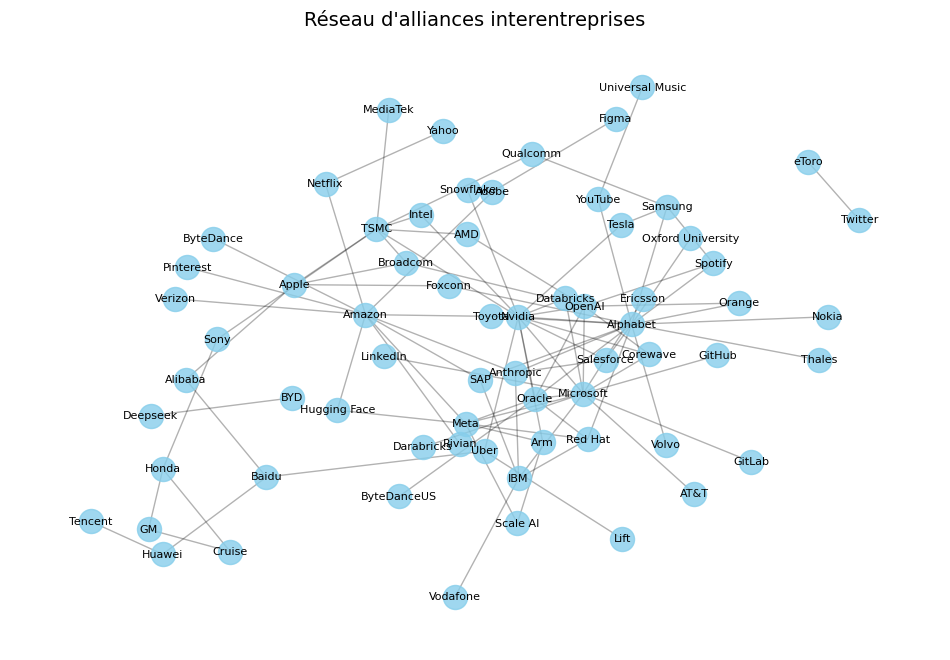

In [41]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.4, seed=42)  # positionnement esthétique
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Réseau d'alliances interentreprises", fontsize=14)
plt.axis('off')
plt.show()

In [5]:
from pyvis.network import Network

# Créer un réseau interactif
net = Network(height="750px", width="100%", bgcolor="#ffffff", font_color="black")

# Charger les données du graphe NetworkX
net.from_nx(G)

# Options esthétiques
net.force_atlas_2based()  # disposition plus harmonieuse
net.show_buttons(filter_=['physics'])  # pour ajuster l'espacement dans le navigateur
net.write_html("reseau_alliances.html")

## Graphe orienté

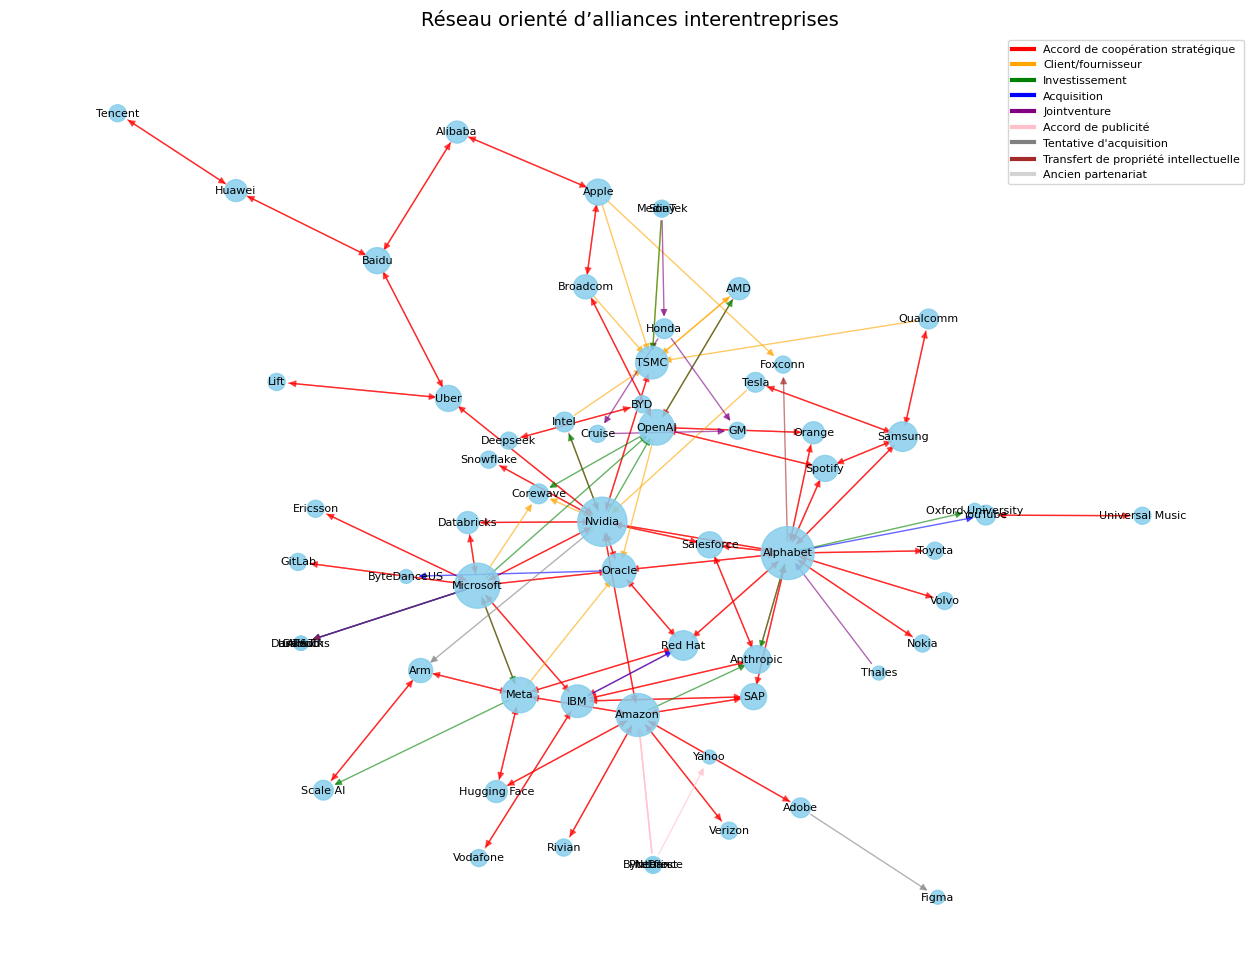

Nombre d’entreprises : 65 | Nombre d’alliances : 156


In [52]:
# Création du graphe orienté
G = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance
couleurs = {
    "Accord de coopération stratégique": "red",
    "Client/fournisseur": "orange",
    "Investissement": "green",
    "Acquisition": "blue",
    "Jointventure": "purple",
    "Accord de publicité": "pink",
    "Tentative d'acquisition": "grey",
    "Transfert de propriété intellectuelle": "brown",
    "Ancien partenariat": "lightgrey"
}

# Ajout des arêtes selon le type
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]

    if type_alliance == "Accord de coopération stratégique":
        # lien symétrique : les deux directions
        G.add_edge(a, b, type=type_alliance)
        G.add_edge(b, a, type=type_alliance)
    else:
        # lien orienté (A -> B)
        G.add_edge(a, b, type=type_alliance)

# Positionnement des nœuds
pos = nx.kamada_kawai_layout(G, scale=3)

# Taille des nœuds selon le degré
deg = dict(G.degree())
node_sizes = [deg[n]*50 + 50 for n in G.nodes()]

# Nœuds
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.85)

# Dessiner les arêtes selon leur type
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Ajouter les labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Légende manuelle
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
plt.legend(loc="best", fontsize=8)

plt.title("Réseau orienté d’alliances interentreprises", fontsize=14)
plt.axis("off")
plt.show()

print(f"Nombre d’entreprises : {G.number_of_nodes()} | Nombre d’alliances : {G.number_of_edges()}")


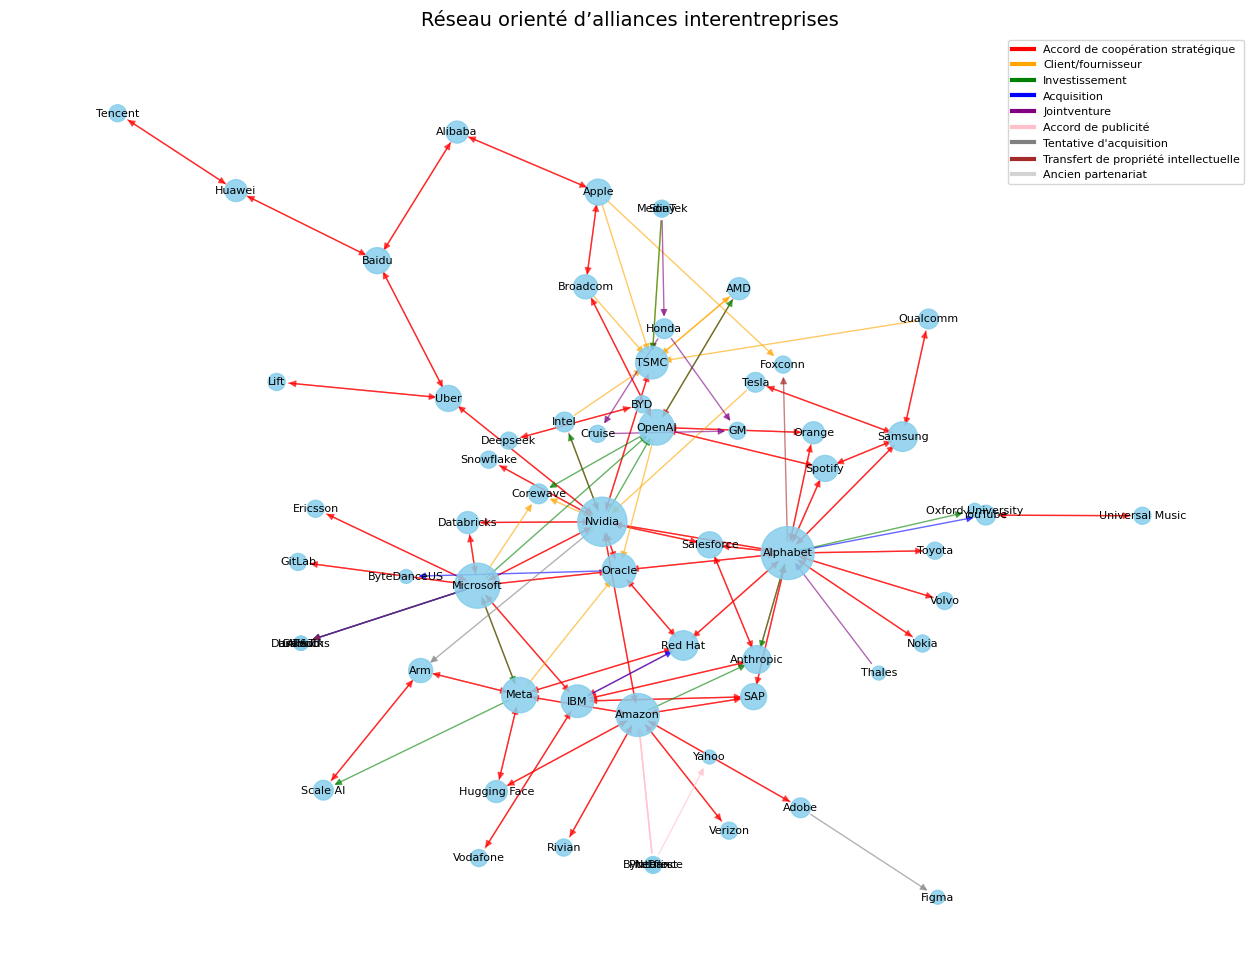

Nombre d’entreprises : 65 | Nombre d’alliances : 156


In [54]:
# --- Création du graphe orienté ---
G = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance
couleurs = {
    "Accord de coopération stratégique": "red",
    "Client/fournisseur": "orange",
    "Investissement": "green",
    "Acquisition": "blue",
    "Jointventure": "purple",
    "Accord de publicité": "pink",
    "Tentative d'acquisition": "grey",
    "Transfert de propriété intellectuelle": "brown",
    "Ancien partenariat": "lightgrey"
}

# Ajout des arêtes selon le type
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]
    if type_alliance == "Accord de coopération stratégique":
        G.add_edge(a, b, type=type_alliance)
        G.add_edge(b, a, type=type_alliance)
    else:
        G.add_edge(a, b, type=type_alliance)

# --- Positionnement des nœuds ---
pos = nx.kamada_kawai_layout(G, scale=3)

# --- Taille des nœuds proportionnelle au degré ---
deg = dict(G.degree())
# nœud minimum 100, maximum proportionnel au degré
node_sizes = [50 + deg[n]*50 for n in G.nodes()]

# --- Dessin ---
plt.figure(figsize=(16, 12))

# Nœuds
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.85)

# Arêtes par type
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Légende
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
plt.legend(loc="best", fontsize=8)

plt.title("Réseau orienté d’alliances interentreprises", fontsize=14)
plt.axis("off")
plt.show()

print(f"Nombre d’entreprises : {G.number_of_nodes()} | Nombre d’alliances : {G.number_of_edges()}")


### Investissement

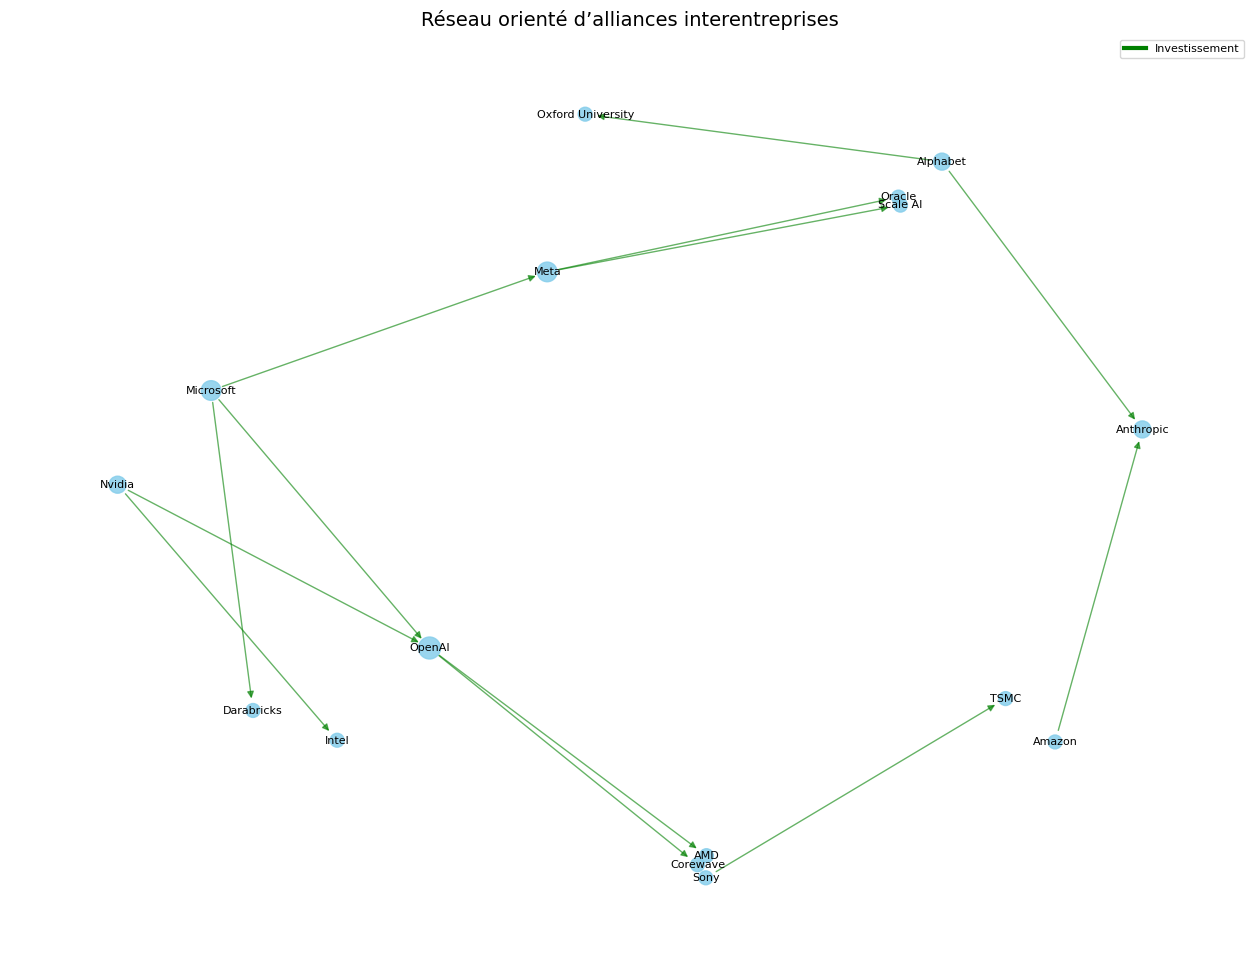

Nombre d’entreprises : 16 | Nombre d’alliances : 13


In [55]:
# --- Création du graphe orienté ---
G = nx.DiGraph()

# Dictionnaire de couleurs par type d’alliance
couleurs = {
    "Investissement": "green",
}

# Ajout des arêtes selon le type
for _, row in deal.iterrows():
    a, b, type_alliance = row["Entreprise A"], row["Entreprise B"], row["Type d'alliance"]
    if type_alliance == "Investissement":
        G.add_edge(a, b, type=type_alliance)
    
# --- Positionnement des nœuds ---
pos = nx.kamada_kawai_layout(G, scale=3)

# --- Taille des nœuds proportionnelle au degré ---
deg = dict(G.degree())
# nœud minimum 100, maximum proportionnel au degré
node_sizes = [50 + deg[n]*50 for n in G.nodes()] # ce serait bien de mettre les noeuds à la taille de la capitalisation boursière de l'entreprise

# --- Dessin ---
plt.figure(figsize=(16, 12))

# Nœuds
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.85)

# Arêtes par type
for type_alliance, color in couleurs.items():
    edges = [(u, v) for u, v, d in G.edges(data=True) if d["type"] == type_alliance]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6, arrows=True, arrowsize=10)

# Labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Légende
for type_alliance, color in couleurs.items():
    plt.plot([], [], color=color, label=type_alliance, linewidth=3)
plt.legend(loc="best", fontsize=8)

plt.title("Réseau orienté d’alliances interentreprises", fontsize=14)
plt.axis("off")
plt.show()

print(f"Nombre d’entreprises : {G.number_of_nodes()} | Nombre d’alliances : {G.number_of_edges()}")
